<a href="https://colab.research.google.com/github/prasanna-venkatesh-m/mobile-price-range-classification/blob/main/RF_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/train.csv')

In [ ]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
def plot_hist(x):
  columns = x.columns
  fig, axes = plt.subplots(6, 4, figsize=(12, 18))

  for i, col in enumerate(columns):
      row = i // 4
      col_idx = i % 4
      axes[row, col_idx].hist(x[col], bins=30)
      axes[row, col_idx].set_xlabel(col)

  plt.tight_layout()
  plt.show()

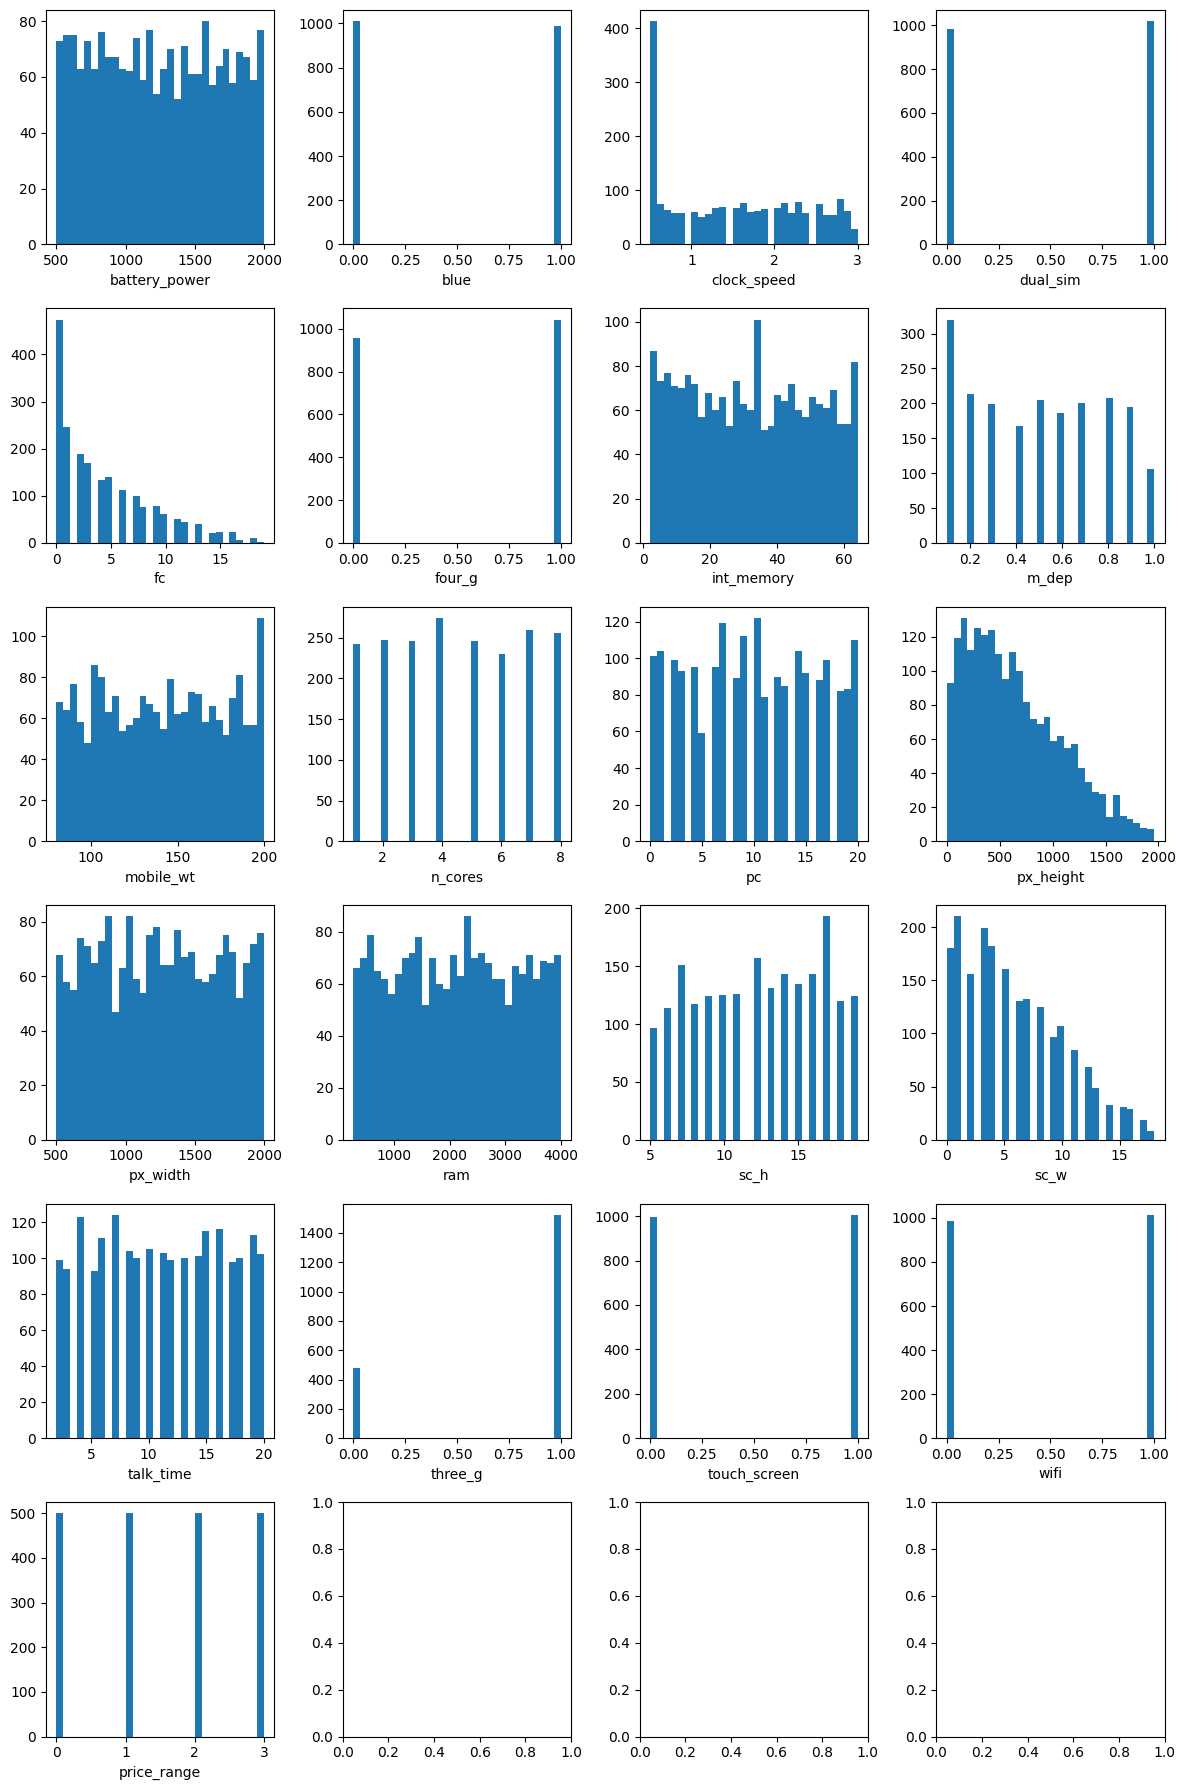

In [ ]:
plot_hist(data)

In [ ]:
def plot_individual_hist(X,y):
  fig, axes = plt.subplots(5,4, figsize=(12,18))
  axes = axes.flatten()
  for i, ax in zip(X.columns, axes):
          ax.scatter(X[i], y)
          ax.set_xlabel(i)
          ax.set_ylabel('Price range')

  plt.tight_layout()
  plt.show()

In [ ]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
print(data.isnull().any())

battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
price_range      False
dtype: bool


In [ ]:
data.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,-0.009952,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


<Axes: >

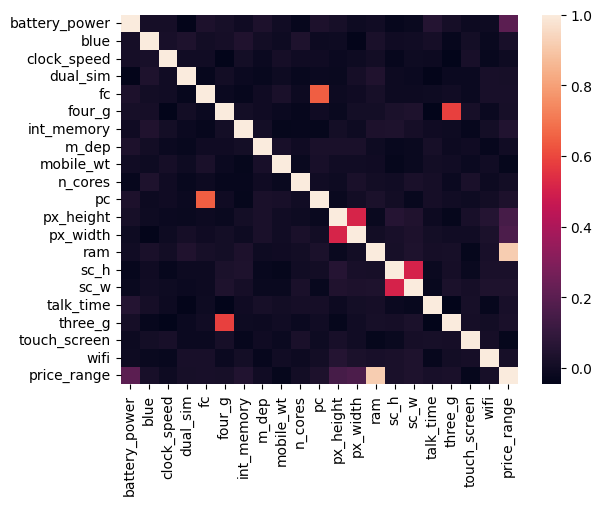

In [ ]:
sns.heatmap(data.corr())

In [ ]:
X = data.drop(columns=['price_range'])
y = data['price_range']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)

In [ ]:
columns = data.columns
filtered_columns = columns.drop(['blue', 'dual_sim', 'four_g', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range' ])

In [ ]:
scaled_data = X_train.copy()
sc = StandardScaler()
scaled_data[filtered_columns] = sc.fit_transform(scaled_data[filtered_columns])
print(scaled_data.head())

      battery_power  blue  clock_speed  ...  three_g  touch_screen  wifi
1357       0.234616     1     0.944423  ...        1             0     1
383       -0.843447     1     1.800695  ...        1             1     1
821        1.469282     1     1.433722  ...        1             1     1
904       -0.394065     0    -0.034174  ...        0             0     0
1386      -1.419927     1     0.088150  ...        1             1     1

[5 rows x 20 columns]


<Axes: >

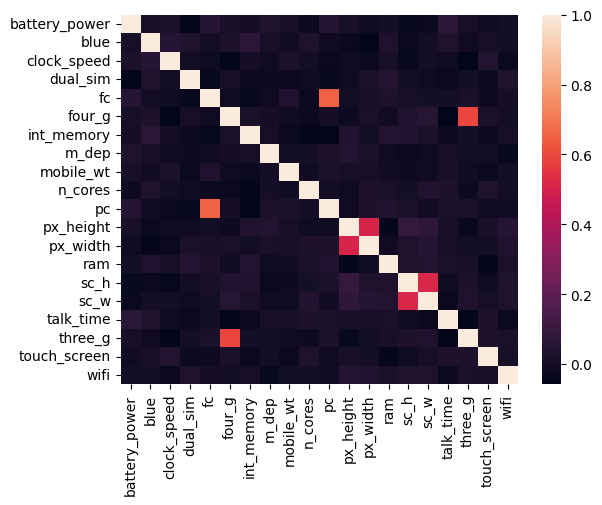

In [ ]:
sns.heatmap(scaled_data.corr())

In [ ]:
scaled_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1.600000e+03,1600.000000,1.600000e+03,1600.000000,1.600000e+03,1600.000000,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1600.000000,1600.000000,1600.000000,1600.000000
mean,1.598721e-16,0.496250,4.218847e-17,0.511875,2.886580e-17,0.524375,8.437695e-17,2.281508e-16,-3.497203e-16,-8.215650e-17,1.199041e-16,4.218847e-17,-7.771561e-17,-3.330669e-17,-3.108624e-17,-3.108624e-17,11.107500,0.757500,0.503750,0.498750
std,1.000313e+00,0.500142,1.000313e+00,0.500015,1.000313e+00,0.499562,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,5.489629,0.428729,0.500142,0.500155
min,-1.667314e+00,0.000000,-1.257421e+00,0.000000,-9.889132e-01,0.000000,-1.668184e+00,-1.391105e+00,-1.679600e+00,-1.553655e+00,-1.628261e+00,-1.458961e+00,-1.719745e+00,-1.715999e+00,-1.716962e+00,-1.336369e+00,2.000000,0.000000,0.000000,0.000000
25%,-8.939455e-01,0.000000,-1.012772e+00,0.000000,-7.580946e-01,0.000000,-8.971672e-01,-1.046719e+00,-8.900543e-01,-6.751084e-01,-8.050234e-01,-8.137490e-01,-8.622510e-01,-8.443363e-01,-7.721974e-01,-8.775296e-01,6.000000,1.000000,0.000000,0.000000
50%,-2.411882e-02,0.000000,-3.417445e-02,1.000000,-2.964576e-01,1.000000,-1.600548e-02,-1.356020e-02,-1.591428e-02,2.034385e-01,1.821413e-02,-1.844539e-01,-2.458398e-03,2.318782e-02,-6.362399e-02,-1.892711e-01,11.000000,1.000000,1.000000,0.000000
75%,8.610277e-01,1.000000,8.526794e-01,1.000000,6.268166e-01,1.000000,8.651563e-01,1.019598e+00,8.582257e-01,1.081985e+00,8.414517e-01,6.881458e-01,8.780244e-01,8.605912e-01,8.811406e-01,7.284069e-01,16.000000,1.000000,1.000000,1.000000
max,1.730287e+00,1.000000,1.800695e+00,1.000000,3.165821e+00,1.000000,1.746318e+00,1.708370e+00,1.704168e+00,1.521259e+00,1.664689e+00,2.997835e+00,1.724024e+00,1.725586e+00,1.589714e+00,2.793183e+00,20.000000,1.000000,1.000000,1.000000


In [ ]:
rf = RandomForestClassifier()
rf.fit(scaled_data, y_train)

RandomForestClassifier()

In [ ]:
y_train_pred = rf.predict(scaled_data)
print(y_train_pred)

[2 2 3 ... 1 0 1]


In [ ]:
print(accuracy_score(y_train_pred, y_train))

0.959375


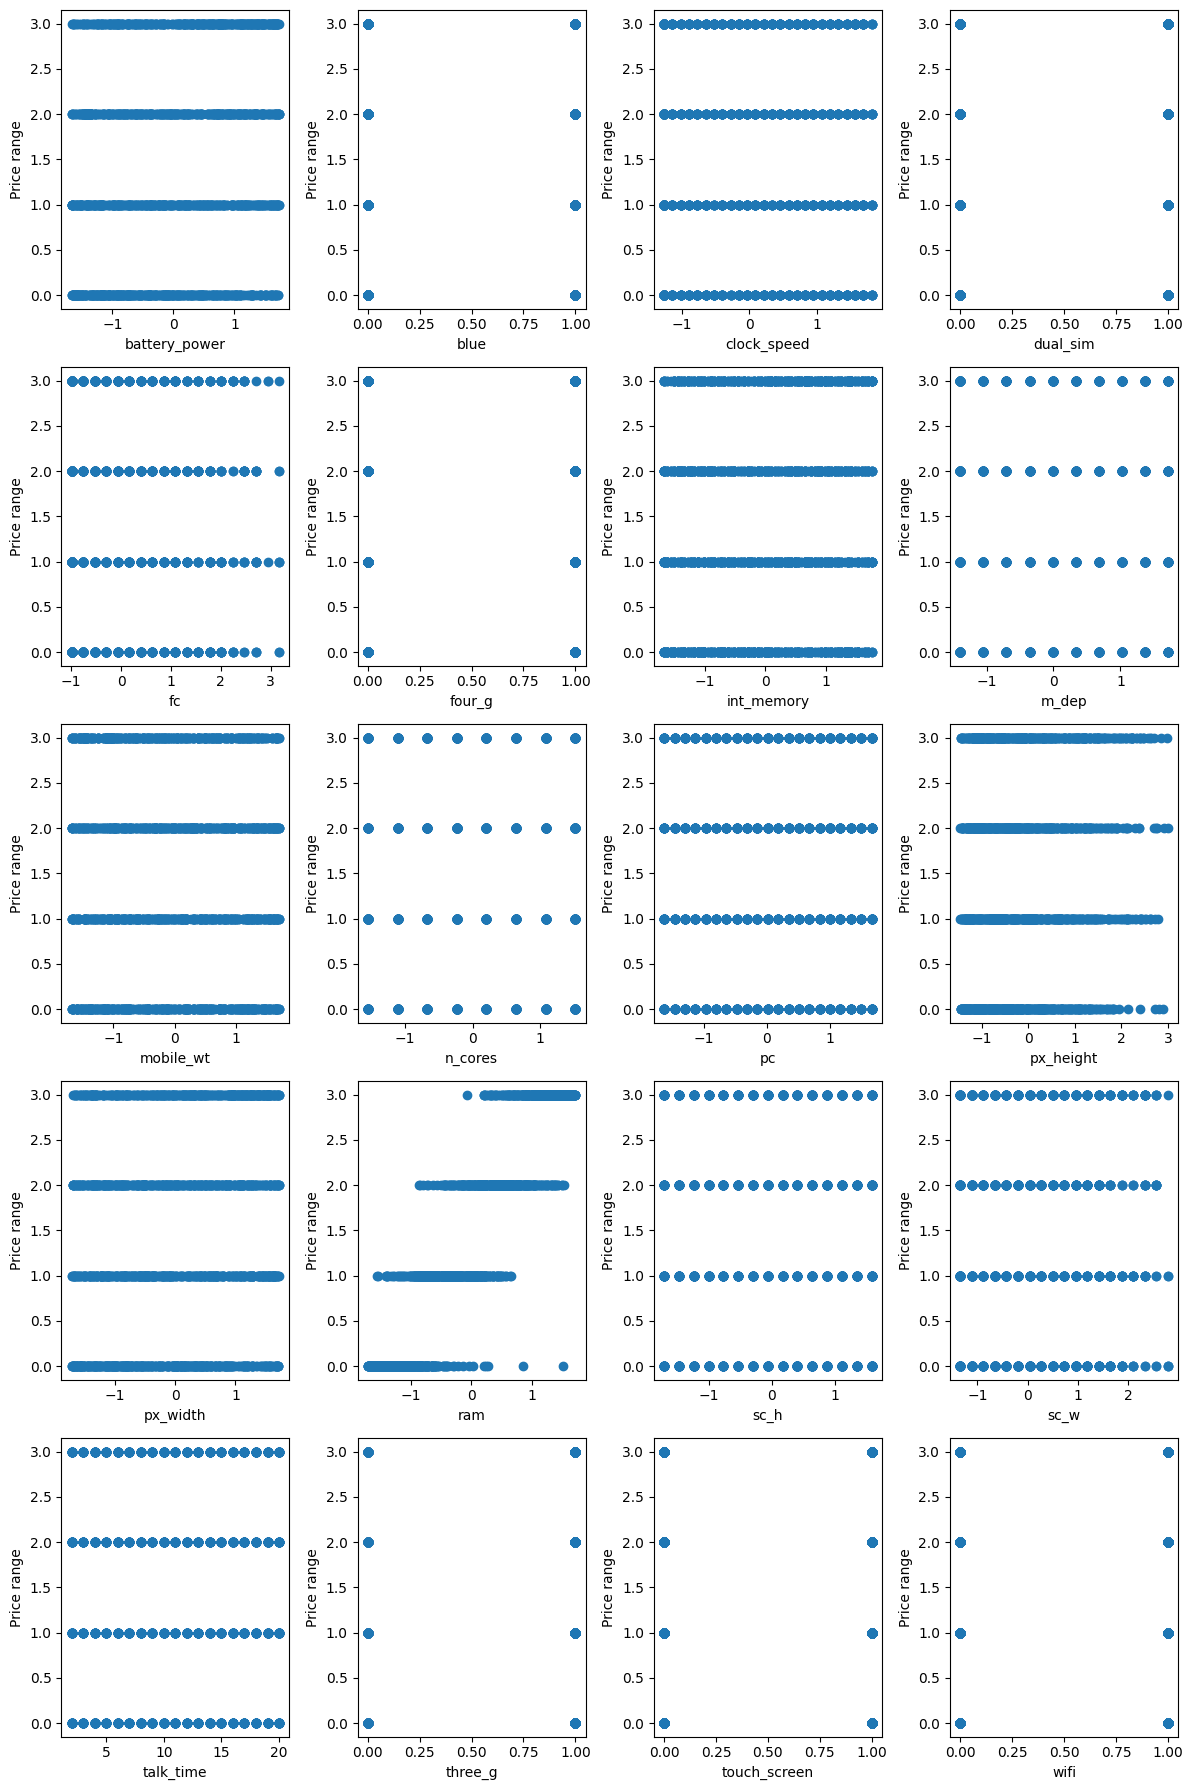

In [ ]:
plot_individual_hist(scaled_data, y_train_pred)

In [ ]:
def plot_confusion_matrix(y_hat, y_actual):
  sns.heatmap(confusion_matrix(y_actual, y_hat), annot=True, fmt='d', cmap='Reds')

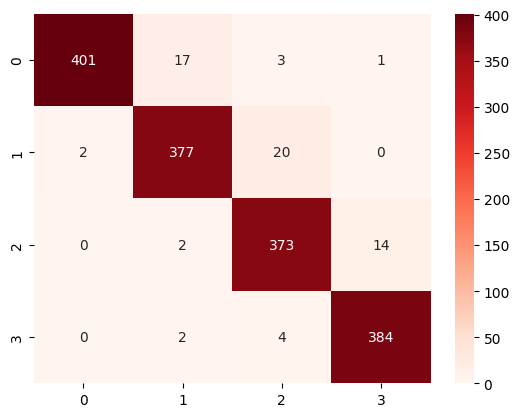

In [ ]:
plot_confusion_matrix(y_train, y_train_pred)

In [ ]:
X_val_scaled = X_val.copy()
X_val_scaled[filtered_columns] = sc.transform(X_val_scaled[filtered_columns])
X_val_scaled.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1189,-1.644618,0,-1.012772,1,-0.758095,1,1.085447,0.675212,1.140206,-1.114382,0.018214,-1.404388,-1.124327,1.603264,-1.008389,-0.648110,7,1,0,1
157,-0.026388,0,-1.257421,0,2.704183,1,-1.447893,-0.357946,-0.861856,0.642712,1.335394,0.239624,-0.970300,-1.486070,-0.536006,-1.336369,11,1,1,1
1158,-0.314628,0,-0.890447,0,1.319272,1,-0.621804,-1.391105,0.576245,1.081985,0.841452,1.444778,0.238927,0.089408,0.644949,0.040148,12,1,0,1
1378,-0.929692,0,-1.257421,1,-0.988913,1,1.360810,-0.013560,-0.128707,-1.114382,-1.628261,-0.654009,-1.650777,-1.654378,1.117332,-0.648110,7,1,0,1
1240,1.721208,1,-0.890447,1,-0.527276,1,-1.392821,0.330826,-1.454016,1.521259,-0.969671,0.057714,-1.234675,-1.533895,-0.299815,0.498987,6,1,1,0


In [ ]:
y_val_pred = rf.predict(X_val_scaled)
print(y_val_pred)

[2 0 1 0 1 3 3 2 1 1 2 3 2 1 0 0 0 3 2 1 2 0 2 2 3 0 1 3 1 1 2 0 2 1 1 3 2
 0 3 3 2 1 3 2 1 2 2 0 1 0 3 0 0 0 2 3 2 1 1 3 1 2 2 0 0 2 0 1 1 0 1 2 0 1
 0 3 2 3 2 3 2 1 0 2 1 0 1 1 0 3 2 0 0 0 1 0 1 2 3 0 1 2 2 1 1 1 1 1 0 1 2
 2 0 1 0 0 2 3 1 3 3 1 3 3 2 3 0 2 0 1 1 0 0 1 3 2 3 2 0 1 2 0 1 0 1 3 2 1
 1 1 2 3 2 1 1 0 3 0 1 2 1 0 3 2 3 0 0 1 2 2 2 1 1 1 0 1 0 0 0 0 3 2 2 1 3
 3 1 1 2 1 0 2 2 2 1 1 1 3 2 0 2 2 1 1 3 3 3 1 3 1 0 0 0 2 3 3 2 0 0 0 0 2
 3 3 0 3 3 3 0 0 3 0 3 1 1 3 1 3 1 0 3 0 0 3 1 3 3 2 0 1 1 2 2 2 2 1 3 1 2
 3 0 1 0 1 2 2 3 2 0 3 3 0 2 3 0 0 0 0 1 2 0 2 2 2 2 0 1 1 1 3 0 1 3 1 2 1
 1 1 0 2 2 2 2 2 3 1 1 3 2 2 1 1 2 3 2 1 2 1 1 1 1 3 0 2 2 1 3 1 1 0 0 0 3
 0 2 3 1 0 3 0 2 2 3 2 3 1 3 0 0 0 1 3 1 3 1 1 3 0 0 3 0 1 2 1 2 3 3 0 1 2
 0 1 3 2 2 2 3 1 1 1 3 1 1 1 0 2 3 3 1 1 2 0 0 2 0 2 0 1 2 2]


In [ ]:
print(accuracy_score(y_val_pred, y_val))

0.7475


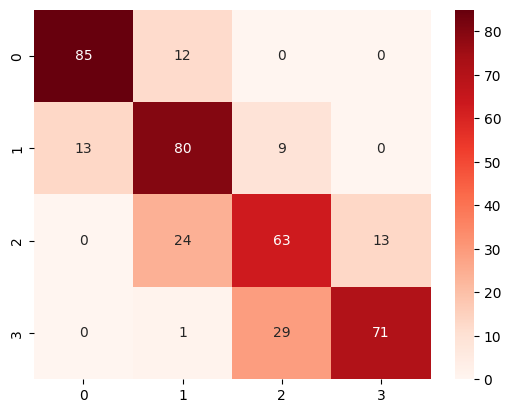

In [ ]:
plot_confusion_matrix(y_val_pred, y_val)